In [94]:
import pandas as pd
import numpy as np
ESG = pd.read_csv(r"C:\Users\m.narese\Desktop\THESIS\REPO\portfolio_optimization\analysis\datasets\1\ESG_data.csv")
ticks = ESG['ticker'].unique()

#clustering#

##data

In [74]:
import pandas as pd
import pandas_datareader as dr
import numpy as np 
import yfinance as yf

snp500url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
data_tab = pd.read_html(snp500url)

tickers = data_tab[0][1:]['Symbol'].tolist()

print("Total number of tickers", len(tickers))

raw = yf.download(tickers, start="2022-01-01", end="2023-10-01", auto_adjust=True)


Total number of tickers 502


[*********************100%***********************]  502 of 502 completed

6 Failed downloads:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2022-01-01 -> 2023-10-01)')
['VLTO', 'SOLV', 'SW', 'GEV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2022-01-01 -> 2023-10-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1696132800")')


In [75]:
dataset = pd.DataFrame(raw)
dataset.sample(5)

Price      Adj Close                               Close              \
Ticker          BF.B BRK.B GEV SOLV  SW VLTO           A        AAPL   
Date                                                                   
2023-08-23       NaN   NaN NaN  NaN NaN  NaN  117.871681  179.999863   
2023-02-09       NaN   NaN NaN  NaN NaN  NaN  150.238342  149.299973   
2022-06-08       NaN   NaN NaN  NaN NaN  NaN  124.434929  145.975021   
2023-05-17       NaN   NaN NaN  NaN NaN  NaN  126.179466  171.390564   
2022-04-05       NaN   NaN NaN  NaN NaN  NaN  130.733200  172.458038   

Price                               ...   Volume                             \
Ticker            ABBV        ABNB  ...      WTW       WY     WYNN      XEL   
Date                                ...                                       
2023-08-23  139.174454  128.130005  ...  1055600  3083400  1298600  8610700   
2023-02-09  137.895996  114.940002  ...  1543200  3438900  7123200  2926500   
2022-06-08  134.463989  123.769997  ...   533400  3939200  2546900  5320300   
2023-05-17  134.157654  108.330002  ...   413700  4708200  5680500  2118000   
2022-04-05  145.998322  171.210007  ...   922700  2985100  2807100  2979400   

Price                                                             
Ticker           XOM      XYL      YUM      ZBH    ZBRA      ZTS  
Date                                                              
2023-08-23  11435600  1012500  1441600  2755200  314800  1022900  
2023-02-09  17439300  1699900  2524200  1228600  478300  1868400  
2022-06-08  31613200   496600  1164800  1084900  600500  1310300  
2023-05-17  14064700  1957400  1690400  1071500  227400  1714500  
2022-04-05  21753100  1346100  2010900  2187100  456700  2059300  

[5 rows x 2516 columns]

In [79]:
missing_frac = dataset.isnull().mean().sort_values(ascending=False)

In [80]:
drop_list = sorted(list(missing_frac[missing_frac > 0.1].index))
dataset.drop(columns=drop_list, axis = 1, inplace=True)
dataset.fillna(method='bfill', axis='index', inplace=True)
print('Null values:', dataset.isnull().values.any())

Null values: False


C:\Users\m.narese\AppData\Local\Temp\ipykernel_12816\2610290400.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='bfill', axis='index', inplace=True)


In [100]:
dataset.shape

(438, 2470)

In [107]:
dataset["Close"].pct_change().std()*np.sqrt(252)


Ticker
A       0.313551
AAPL    0.305262
ABBV    0.215976
ABNB    0.540035
ABT     0.240143
          ...   
XYL     0.308410
YUM     0.210399
ZBH     0.264891
ZBRA    0.444900
ZTS     0.292219
Length: 494, dtype: float64

##data transormation

In [112]:
returns = dataset.pct_change().mean()*252
returns = pd.DataFrame(returns)
df_reset = returns.reset_index()

# Pivot the table
df = df_reset.pivot(index="Ticker", columns="Price", values=0).reset_index()
# df.drop(columns=['Price'], inplace=True)
# Display the reshaped DataFrame
print(df)


Price Ticker     Close      High       Low      Open     Volume
0          A -0.138961 -0.151758 -0.136206 -0.136469  19.204363
1       AAPL  0.016920  0.008886  0.018796  0.034292   6.883121
2       ABBV  0.117933  0.126701  0.128363  0.131518  18.078345
3       ABNB  0.013664 -0.003412  0.019132  0.048075  23.136807
4        ABT -0.161887 -0.161978 -0.160297 -0.155723  12.943655
..       ...       ...       ...       ...       ...        ...
489      XYL -0.083403 -0.105788 -0.087621 -0.094822  29.792444
490      YUM -0.010019 -0.021517 -0.010676 -0.016377  16.503105
491      ZBH -0.020790 -0.019955 -0.014461 -0.004203  22.868610
492     ZBRA -0.419570 -0.450241 -0.433518 -0.430253  20.003492
493      ZTS -0.120135 -0.143313 -0.115322 -0.128284  15.009043

[494 rows x 6 columns]


In [63]:
returns['Volatility'] = dataset.pct_change().std()*np.sqrt(252)
DATA = returns

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(DATA)
rescaledDataset = pd.DataFrame(scaler.fit_transform(DATA), columns=DATA.columns, index=DATA.index)
rescaledDataset.head(6)

,Returns,Volatility
Ticker,,
A,-0.749852,-0.122565
AAPL,0.065333,-0.207036
ABBV,0.593583,-1.116930
ABNB,0.048307,2.185473
ABT,-0.869744,-0.870644
ACGL,1.915912,-0.611996


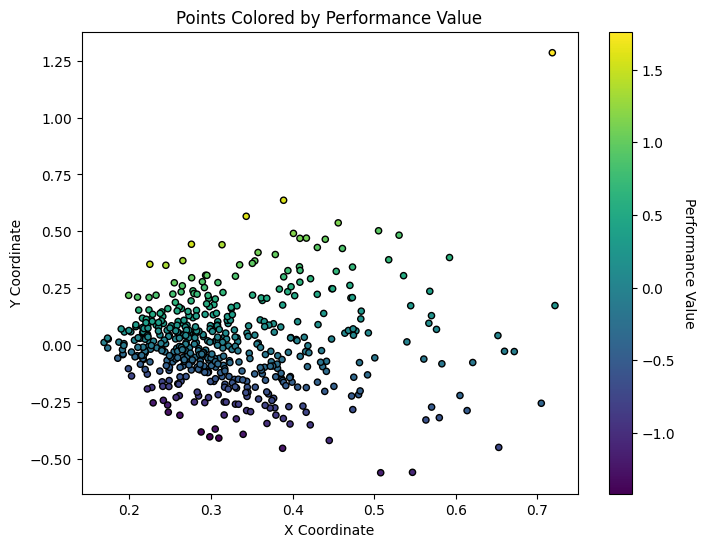

In [71]:
import matplotlib.pyplot as plt


performance = (DATA["Returns"] - 0.02) / DATA["Volatility"]

# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(DATA["Volatility"], DATA["Returns"], c=performance, cmap='viridis', s=20, edgecolor='k')

# Add a colorbar to indicate performance values
cbar = plt.colorbar(scatter)
cbar.set_label('Performance Value', rotation=270, labelpad=15)

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Points Colored by Performance Value')

# Display the plot
plt.show()

#join esg

In [19]:
import importlib
import analysis.data.utils_analysis as utils_analysis
importlib.reload(utils_analysis)
from analysis.data.utils_analysis import create_full_dataset
full_df = create_full_dataset(data, ESG)

In [20]:

df = full_df.sort_values(by=['Ticker', 'Date'])

# Group by Ticker and calculate percentage change
df['Pct_Change'] = df.groupby('Ticker')['Close'].pct_change()

# Pivot the DataFrame to get tickers as columns
df = df.pivot(index='Date', columns='Ticker', values='Pct_Change')

# Optional: Rename columns to include "_pct_change" for clarity
df.columns = [f"{ticker}" for ticker in df.columns]

# Reset the index if needed
df.reset_index(inplace=True)
df.dropna()

,Date,AAPL,AMZN,DIS,GOOG,GOOGL,JNJ,JPM,KO,MA,META,MSFT,NVDA,PEP,PG,TSLA,UNH,V,WMT,XOM
1,2015-01-05,-0.028172,-0.020517,-0.014613,-0.020846,-0.019054,-0.006984,-0.031046,0.000000,-0.028128,-0.016061,-0.009196,-0.016890,-0.007518,-0.004754,-0.042041,-0.016471,-0.022074,-0.002910,-0.027362
2,2015-01-06,0.000094,-0.022833,-0.005304,-0.023177,-0.024679,-0.004914,-0.025929,0.007594,-0.002162,-0.013473,-0.014677,-0.030318,-0.007575,-0.004555,0.005664,-0.002018,-0.006444,0.007706,-0.005317
3,2015-01-07,0.014022,0.010600,0.010230,-0.001713,-0.002941,0.022076,0.001526,0.012482,0.015555,0.000000,0.012705,-0.002606,0.029241,0.005245,-0.001562,0.010210,0.013398,0.026532,0.010133
4,2015-01-08,0.038423,0.006836,0.010341,0.003153,0.003484,0.007863,0.022347,0.012096,0.015555,0.026658,0.029418,0.037618,0.018174,0.011436,-0.001564,0.047733,0.013412,0.021106,0.016645
5,2015-01-09,0.001073,-0.011749,0.004905,-0.012950,-0.012211,-0.013629,-0.017387,-0.011032,-0.012744,-0.005628,-0.008405,0.004028,-0.006771,-0.009330,-0.018802,-0.009360,-0.014823,-0.012379,-0.001410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,2024-01-23,0.006653,0.008011,-0.013778,0.006567,0.007192,-0.016372,-0.006584,0.004700,-0.002251,0.008958,0.006028,0.003671,0.015323,0.041391,0.001628,0.004932,0.000221,0.002525,0.011258
2279,2024-01-24,-0.003484,0.005448,-0.002879,0.011232,0.011289,-0.005319,0.008935,-0.015706,-0.000137,0.014278,0.009175,0.024869,-0.012169,-0.012079,-0.006264,-0.004442,0.001438,-0.014128,0.017261
2280,2024-01-25,-0.001697,0.005610,0.014545,0.021882,0.021318,0.003774,0.014311,0.004244,-0.004331,0.006347,0.005738,0.004156,0.005797,0.023008,-0.121253,-0.038638,0.003534,0.014579,0.025401
2281,2024-01-26,-0.009013,0.008685,0.005271,0.000976,0.002107,-0.000376,-0.003816,0.003550,0.003961,0.002442,-0.002322,-0.009510,0.007805,0.003342,0.003395,0.019862,-0.017131,0.008782,0.008519


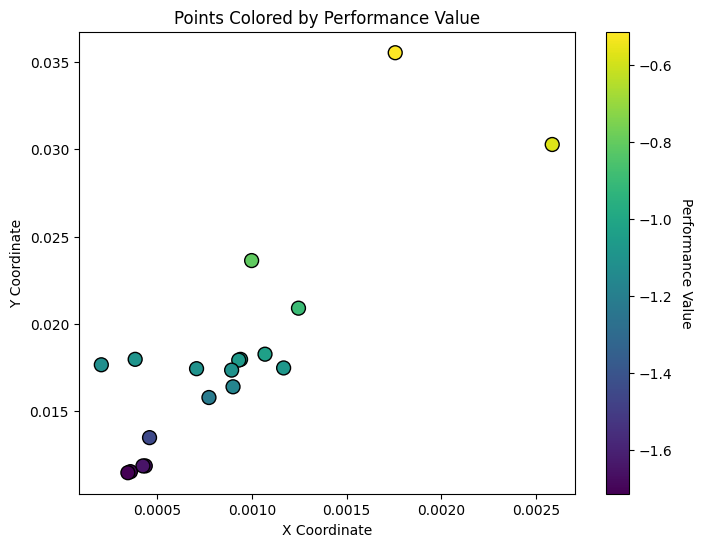

In [30]:
import matplotlib.pyplot as plt
returns = np.array(df.drop(columns=['Date']).dropna())
mean_returns = np.mean(returns, axis=0)
std_dev = np.std(returns, axis=0)


performance = (mean_returns - 0.02) / std_dev

# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(mean_returns, std_dev, c=performance, cmap='viridis', s=100, edgecolor='k')

# Add a colorbar to indicate performance values
cbar = plt.colorbar(scatter)
cbar.set_label('Performance Value', rotation=270, labelpad=15)

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Points Colored by Performance Value')

# Display the plot
plt.show()